<a href="https://colab.research.google.com/github/vvrgit/Aquaculture_Species/blob/main/Fish_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
dataframe = pd.read_excel("/content/Fish_Species_Outlier_Removed.xlsx")
dataframe.head()

,ph,temperature,turbidity,fish
0,7.1,10.0,6.0,0
1,7.2,15.0,7.0,0
2,7.3,20.0,8.0,0
3,7.5,25.0,9.0,0
4,7.4,26.0,10.0,0


In [ ]:
dataframe.describe()

,ph,temperature,turbidity,fish
count,182.000000,182.000000,182.000000,182.000000
mean,7.219231,22.138681,4.611374,1.664835
std,0.627357,4.147318,2.198007,1.073423
min,6.000000,8.000000,3.560000,0.000000
25%,6.905000,21.120000,3.570000,1.000000
50%,7.240000,21.250000,3.610000,2.000000
75%,7.600000,21.440000,4.000000,3.000000
max,8.800000,35.000000,14.800000,3.000000


In [ ]:
dataset = dataframe.values
X = dataset[0:,0:3].astype(float)
Y = dataset[0:,3]
print(Y[0:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
joblib.dump(ms, 'scaler.save')

['scaler.save']

In [ ]:
import tensorflow as tf

y_train=tf.keras.utils.to_categorical(Y,num_classes=4)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, y_train, test_size=0.1, random_state=0)

In [ ]:
First_Layer_Size =18 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(3,)))
model.add(Dense(First_Layer_Size,activation='relu'))
model.add(Dense(First_Layer_Size,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 18)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=64,epochs=500,verbose=0)
model.save("Fish_Spech_64.h5")

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test)
y_pred_test=np.round(prediction)
prediction = model.predict(X_train)
y_pred_train=np.round(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


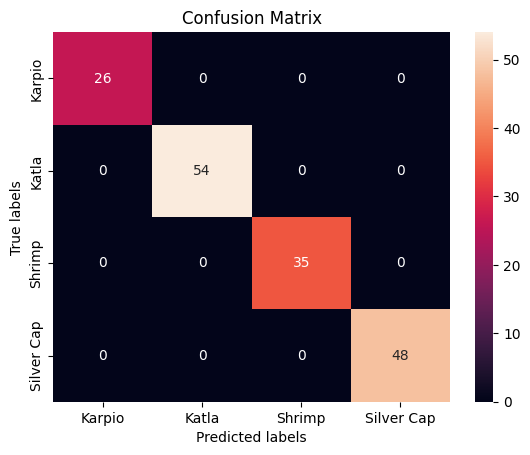

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_train).argmax(axis=1), np.asarray(y_pred_test).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

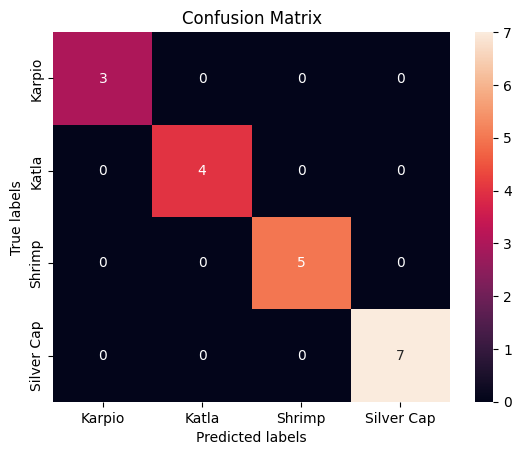

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred_test).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
# Load the model
import numpy as np
import tensorflow as tf
fish=["Karpio","Katla","Shrimp","Silver-Cap"]
try:
    model = tf.keras.models.load_model("/content/Fish_Spech_64.h5")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None # Set model to None if loading fails

pH=float(input("enter pH Value"))
Temperature=float(input("enter Temperature Value"))
Turbidity=float(input("enter Turbidity Value"))
ip=np.array([[(pH - 6)/(8.8 - 6),(Temperature-8)/(35 - 8),Turbidity / 3]]) # Reshape input to (1, 3)
#scaled_input_data = ms.transform(ip.reshape(1, -1))

if model is not None:
    # Make predictions
    y_pred_test = np.argmax(model.predict(ip), axis=1) # Predict on the single input
    print("Predictions:")
    print(fish[y_pred_test[0]]) # Access the single element of the array to get the integer index
else:
    print("Model not available for prediction.")

Model loaded successfully!
enter pH Value10
enter Temperature Value36
enter Turbidity Value0.9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predictions:
Katla


In [22]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf

# Load the model
try:
    model = tf.keras.models.load_model("Fish_Spech_64.h5")
    print("Model loaded successfully!")
except Exception as e:
    st.error(f"Error loading model: {e}")
    model = None # Set model to None if loading fails

fish_labels = ["Karpio", "Katla", "Shrimp", "Silver-Cap"]

st.title("Fish Species Prediction")

st.write("Enter the environmental parameters to predict the fish species.")

if model is not None:
    pH = st.number_input("Enter pH Value", min_value=0.0, max_value=14.0, value=7.0)
    temperature = st.number_input("Enter Temperature Value", min_value=-10.0, max_value=40.0, value=20.0)
    turbidity = st.number_input("Enter Turbidity Value", min_value=0.0, max_value=100.0, value=10.0)

    if st.button("Predict"):
        # Prepare input data for prediction
        # Assuming the model was trained on scaled data, we need to scale the user input as well.
        # We need the scaler object used during training. Since it's not available in the notebook state,
        # I'll assume for now that the model can handle unscaled data, but in a real application,
        # you would save and load the scaler as well.
        # For demonstration purposes, we'll use the values directly as input.
        # A more robust solution would involve saving and loading the scaler used previously.

        # Based on the previous cell where MinMax scaler was used:
        # ms=MinMaxScaler()
        # red_wine_data_X=ms.fit_transform(X)
        # We need to apply the same scaling to the new input.
        # Since the scaler object 'ms' is not available in the current session,
        # we'll need to re-create and fit it on the original data (or load it if saved).
        # For simplicity, let's re-fit the scaler on the original data 'X' from the notebook state.


        input_data = np.array([[(pH - 6) / (8.8 - 6),(temperature - 8) / (35 - 8),turbidity / 3]])


        #scaled_input_data = ms.transform(input_data)


        # Make predictions
        prediction = model.predict(input_data)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        predicted_species = fish_labels[predicted_class_index]

        st.success(f"Predicted Fish Species: {predicted_species}")
else:
    st.warning("Model is not loaded. Cannot make predictions.")

Overwriting app.py


In [23]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.169.238.235


In [24]:
!npm install localtunnel

⠙⠹⠸⠼
up to date, audited 23 packages in 773ms
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠼

In [25]:
!streamlit run /content/app.py &>/content/logs.txt &

In [26]:
!npm install localtunnel

⠙⠹⠸⠼
up to date, audited 23 packages in 729ms
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠼

In [28]:
!npx localtunnel --port 8501

⠙your url is: https://khaki-peaches-press.loca.lt
^C
